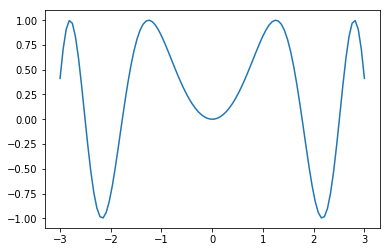

/usr/local/lib/python2.7/site-packages/tvtk/array_handler.py:268: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
No handlers could be found for logger "mayavi.core.common"
Exception occurred in traits notification handler for object: <mayavi.tools.decorations.Axes object at 0x123212350>, trait: extent, old value: [0 0 0 0 0 0], new value: [-3.          3.          1.46059215  1.46059215 -0.99627095  0.99620914]
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/traits/trait_notifiers.py", line 340, in __call__
    self.handler( *args )
  File "/usr/local/lib/python2.7/site-packages/mayavi/tools/decorations.py", line 373, in _extent_changed
    axes.module_manager.source.outputs[0].bounds
AttributeError: 'PolyDataNormals' object has no attribute 'bounds'


Exception occurred in traits notification handler.
Please check the log file for details.


In [1]:
from mayavi import mlab
from scipy import sin, ogrid, array
from pylab import plot, show 

# prepare data, hence test scipy elements
x , y = ogrid[-3:3:100j , -3:3:100j]
z = sin(x**2 + y**2)

# test matplotlib
plot(x, sin(x**2)); show()

#now mayavi2
obj = mlab.surf(x,y,z)
P = mlab.pipeline
scalar_cut_plane = P.scalar_cut_plane(obj, plane_orientation='y_axes')
scalar_cut_plane.enable_contours = True
scalar_cut_plane.contour.filled_contours = True
scalar_cut_plane.implicit_plane.widget.origin = array([  0.00000000e+00,   1.46059210e+00,  -2.02655792e-06])

scalar_cut_plane.warp_scalar.filter.normal = array([ 0.,  1.,  0.])
scalar_cut_plane.implicit_plane.widget.normal = array([ 0.,  1.,  0.])
f = mlab.gcf()
f.scene.camera.azimuth(10)

f.scene.show_axes = True
f.scene.magnification = 4 # or 4
mlab.axes()

# Now animate the data.
dt = 0.01; N = 40
ms = obj.mlab_source
for k in xrange(N):
    x = x + k*dt
    scalars = sin(x**2 + y**2)
    ms.set(x=x, scalars=scalars)